In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import re
import warnings

In [2]:


directory = "/home/amnkmr/SIP/data_team5/data-team5/output_EOR_overdensity_SURFGEN/output1/Shapefinder_stat/entire_box/"

# Initialize lists to store data
data = []

# Process each file in the directory
for filename in os.listdir(directory):
    if filename.startswith("Shapefinders_copy.0_z") and filename.endswith("_subbox0"):
        # Extract redshift from filename
        parts = filename.split('_')
        z_str = parts[2][1:]  # Remove 'z' from z-value
        try:
            redshift = float(z_str)
        except ValueError:
            continue  # Skip if redshift can't be parsed
        
        filepath = os.path.join(directory, filename)
        
        # Read and process the file
        with open(filepath, 'r') as file:
            line = file.readline().strip()
            values = line.split()
            
            if len(values) < 14:
                continue  # Skip invalid lines
                
            # Extract shapefinder values
            arr12 = list(map(float, values[2:14]))
            
            # Process shapefinders as per README
            a6 = abs(arr12[6])
            a7 = abs(arr12[7])
            a8 = abs(arr12[8])
            
            # Calculate L, T, B
            L_val = max(a6, a7, a8)
            T_val = min(a6, a7, a8)
            B_val = (a6 + a7 + a8) - L_val - T_val
            
            # Store results
            data.append({
                'filename': filename,
                'redshift': redshift,
                'T': T_val,
                'B': B_val,
                'L': L_val,
                'Volume': arr12[0],
                'Area': arr12[1],
                'IMC': arr12[2],
                'Genus': arr12[3]
            })

# Create DataFrame and sort by Volume
df = pd.DataFrame(data).sort_values('Volume')

# Display the first few rows for verification
print("Shapefinder Data:")
print(df[['redshift', 'Volume', 'T', 'B', 'L']].head())

# Save to CSV for future use
df.to_csv('EoR_shapefinder_data.csv', index=False)
print("\nData saved to 'EoR_shapefinder_EBdata.csv'")

FileNotFoundError: [Errno 2] No such file or directory: '/home/amnkmr/SIP/data_team5/data-team5/output_EOR_overdensity_SURFGEN/output1/Shapefinder_stat/entire_box/'

In [ ]:
import os
import pandas as pd
import glob
import re

# Base directory path
base_dir = '/home/amnkmr/SIP/data_team5/data-team5/output_EOR_overdensity_SURFGEN/output1/Shapefinder_stat/small_box'

# Match files that are Shapefinders and from whole-box analysis (subbox0)
file_pattern = os.path.join(base_dir, 'Shapefinders_*_subbox0')

# List of matching files
shapefinder_files = sorted(glob.glob(file_pattern))

# Column names based on data structure from the README
columns = [
    'NN', 'Ncount', 'vol', 'area', 'IMC', 'Genus', 'val6', 'val7', 'val8',
    'T', 'B', 'L', 'P', 'F'
]

# Extract redshift from filename using regex
def extract_redshift(filename):
    match = re.search(r'_z([\d.]+)_', filename)
    return float(match.group(1)) if match else None

# Read and combine data
df_list = []
for file in shapefinder_files:
    try:
        df = pd.read_csv(file, delim_whitespace=True, comment='#', names=columns)
        df['filename'] = os.path.basename(file)
        df['z'] = extract_redshift(file)
        df_list.append(df)
    except Exception as e:
        print(f"Failed to read {file}: {e}")

# Combine into one DataFrame
all_shapefinder_df = pd.concat(df_list, ignore_index=True)

T_input = all_shapefinder_df['T']
B_input = all_shapefinder_df['B']
L_input = all_shapefinder_df['L']

# Recompute actual T, B, L
new_L = pd.concat([T_input, B_input, L_input], axis=1).max(axis=1)
new_T = pd.concat([T_input, B_input, L_input], axis=1).min(axis=1)
new_B = T_input + B_input + L_input - new_L - new_T

# Recompute Planarity and Filamentarity
P = (new_B - new_T) / (new_B + new_T + 1e-10)  
F = (new_L - new_B) / (new_L + new_B + 1e-10)

# Update DataFrame
all_shapefinder_df['T'] = new_T
all_shapefinder_df['B'] = new_B
all_shapefinder_df['L'] = new_L
all_shapefinder_df['P'] = P
all_shapefinder_df['F'] = F

# Save updated data
all_shapefinder_df.to_csv('shapefinders_all_small_box.csv', index=False)

# Show preview
print(all_shapefinder_df.head())


/tmp/ipykernel_15334/4108027942.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, comment='#', names=columns)
/tmp/ipykernel_15334/4108027942.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, comment='#', names=columns)
/tmp/ipykernel_15334/4108027942.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, comment='#', names=columns)
/tmp/ipykernel_15334/4108027942.py:30: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, 

   NN  Ncount        vol       area  IMC      Genus       val6  val7  \
0   4      30  17.651269  55.557735  0.0  34.465460  39.944474   0.0   
1  45      15   9.009042  26.615768  0.0  18.525497  20.758013   0.0   
2  68      12   6.949562  23.725819  0.0  18.662622  21.092915   0.0   
3  73      21   8.225380  40.686338  0.0  36.887160  43.549863   0.0   
4  78      17  10.338766  33.905717  0.0  24.515254  27.547983   0.0   

       val8         T         B         L         P         F  \
0  0.953131  0.186750  1.390874  3.178680  0.763252  0.391243   
1  1.015455  0.116091  1.282192  1.651870  0.833952  0.125995   
2  0.878734  0.122827  1.124824  1.678521  0.803107  0.197513   
3  0.606497  0.212722  0.934247  3.465588  0.629071  0.575326   
4  0.914781  0.147284  1.230788  2.192199  0.786246  0.280869   

                                            filename       z  
0  Shapefinders_iso0.500000_count10_z13.221000_sc...  13.221  
1  Shapefinders_iso0.500000_count10_z13.221000_sc.

In [ ]:
# Remove rows with any negative values in numerical columns
numerical_columns = all_shapefinder_df.select_dtypes(include=['number']).columns
processed_df = all_shapefinder_df[(all_shapefinder_df[numerical_columns] >= 0).all(axis=1)]

# Save the cleaned DataFrame
processed_df.to_csv('shapefinders_all_subbox0_cleaned.csv', index=False)

# Preview the cleaned data
print(processed_df.head())
print(f"Original rows: {len(all_shapefinder_df)}, Cleaned rows: {len(processed_df)}")


   NN  Ncount        vol       area  IMC      Genus       val6  val7  \
0   4      30  17.651269  55.557735  0.0  34.465460  39.944474   0.0   
1  45      15   9.009042  26.615768  0.0  18.525497  20.758013   0.0   
2  68      12   6.949562  23.725819  0.0  18.662622  21.092915   0.0   
3  73      21   8.225380  40.686338  0.0  36.887160  43.549863   0.0   
4  78      17  10.338766  33.905717  0.0  24.515254  27.547983   0.0   

       val8         T         B         L         P         F  \
0  0.953131  0.186750  1.390874  3.178680  0.763252  0.391243   
1  1.015455  0.116091  1.282192  1.651870  0.833952  0.125995   
2  0.878734  0.122827  1.124824  1.678521  0.803107  0.197513   
3  0.606497  0.212722  0.934247  3.465588  0.629071  0.575326   
4  0.914781  0.147284  1.230788  2.192199  0.786246  0.280869   

                                            filename       z  
0  Shapefinders_iso0.500000_count10_z13.221000_sc...  13.221  
1  Shapefinders_iso0.500000_count10_z13.221000_sc.

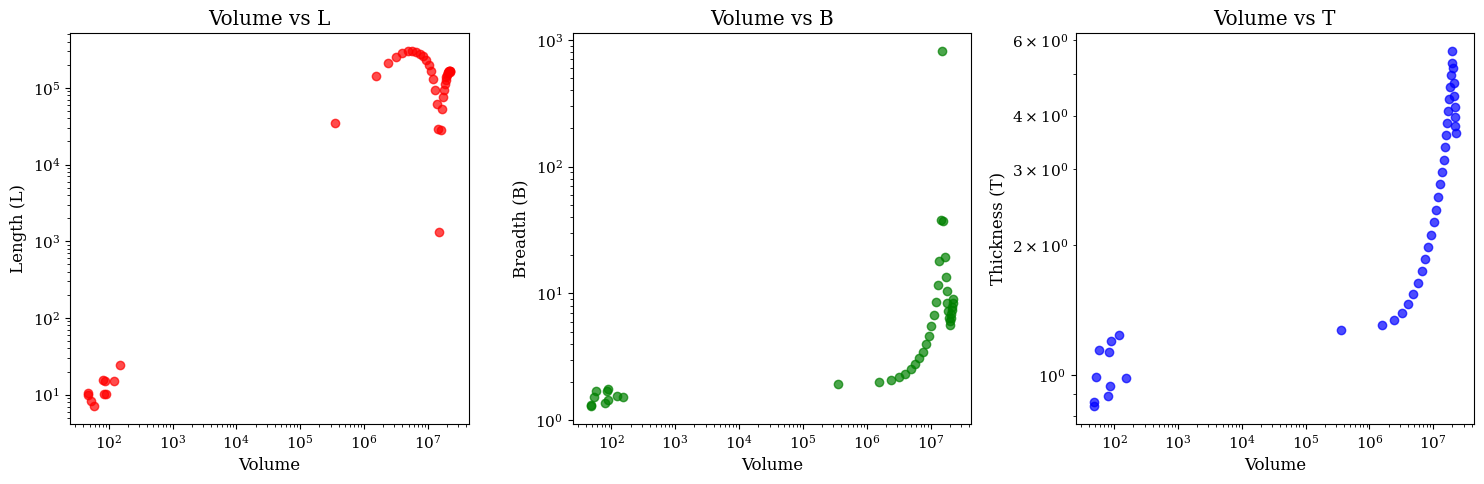

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'EoR_shapefinder_data.csv'  # Adjust path if needed
df = pd.read_csv(file_path)

# Set figure size
plt.figure(figsize=(15, 5))

# Plot Volume vs L
plt.subplot(1, 3, 1)
plt.scatter(df['Volume'], df['L'], color='red', alpha=0.7)
plt.xlabel('Volume')
plt.ylabel('Length (L)')
plt.title('Volume vs L')
plt.xscale('linear')  
plt.yscale('log')
plt.xscale('log')
# Plot Volume vs B
plt.subplot(1, 3, 2)
plt.scatter(df['Volume'], df['B'], color='green', alpha=0.7)
plt.xlabel('Volume')
plt.ylabel('Breadth (B)')
plt.title('Volume vs B')
plt.yscale('log')
plt.xscale('log')
# Plot Volume vs T
plt.subplot(1, 3, 3)
plt.scatter(df['Volume'], df['T'], color='blue', alpha=0.7)
plt.xlabel('Volume')
plt.ylabel('Thickness (T)')
plt.title('Volume vs T')
plt.yscale('log')
plt.xscale('log')

# Layout and show
plt.tight_layout()
plt.show()


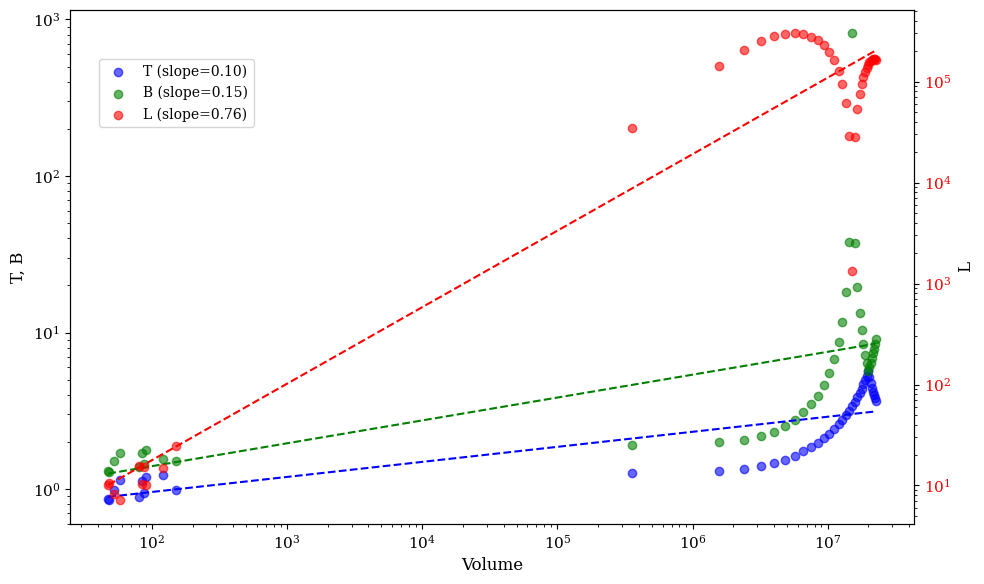

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
file_path = 'EoR_shapefinder_data.csv'
df = pd.read_csv(file_path)

# Filter out non-positive values
df = df[(df['Volume'] > 0) & (df['L'] > 0) & (df['B'] > 0) & (df['T'] > 0)]

# Log-transformed Volume
log_vol = np.log10(df['Volume'])

# Prepare the figure and left axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left y-axis for T and B
for var, color in zip(['T', 'B'], ['blue', 'green']):
    log_y = np.log10(df[var])
    slope, intercept = np.polyfit(log_vol, log_y, 1)
    ax1.scatter(df['Volume'], df[var], color=color, alpha=0.6, label=f'{var} (slope={slope:.2f})')
    x_fit = np.logspace(log_vol.min(), log_vol.max(), 100)
    y_fit = 10**(slope * np.log10(x_fit) + intercept)
    ax1.plot(x_fit, y_fit, color=color, linestyle='--')

ax1.set_xlabel('Volume')
ax1.set_ylabel('T, B')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(axis='y')

# Right y-axis for L
ax2 = ax1.twinx()
log_L = np.log10(df['L'])
slope_L, intercept_L = np.polyfit(log_vol, log_L, 1)
ax2.scatter(df['Volume'], df['L'], color='red', alpha=0.6, label=f'L (slope={slope_L:.2f})')
y_fit_L = 10**(slope_L * np.log10(x_fit) + intercept_L)
ax2.plot(x_fit, y_fit_L, color='red', linestyle='--')
ax2.set_ylabel('L')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='red')


fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()


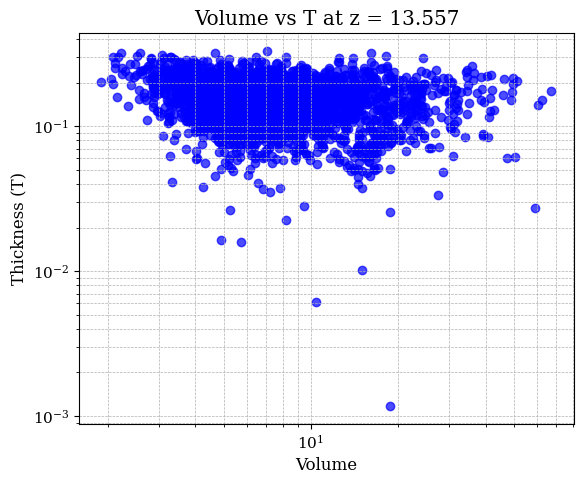

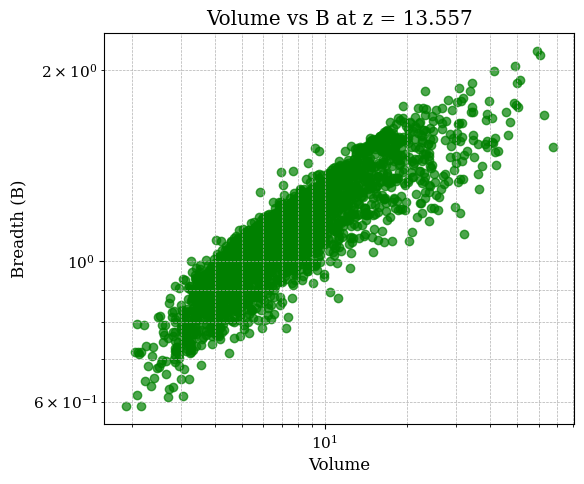

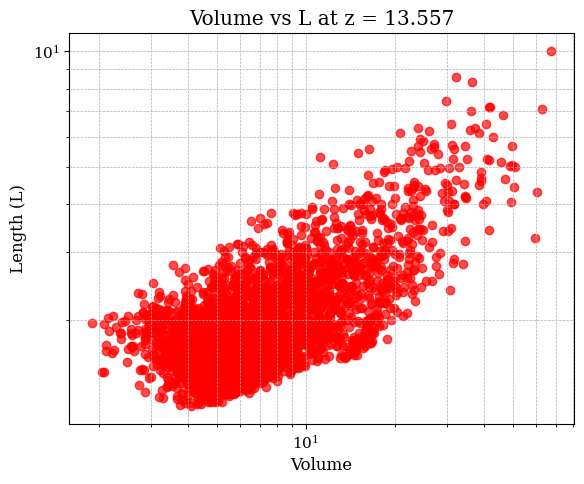

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned shapefinder data
file_path = 'shapefinders_all_small_box.csv'  
df = pd.read_csv(file_path)

# Filter for the specific redshift 13.221
redshift_value = 13.557
df_z = df[df['z'] == redshift_value]

# Check if any data exists for this redshift
if df_z.empty:
    print(f"No entries found for redshift = {redshift_value}")
else:
    # Plot Volume vs T
    plt.figure(figsize=(6, 5))
    plt.scatter(df_z['vol'], df_z['T'], color='blue', alpha=0.7)
    plt.xlabel('Volume')
    plt.ylabel('Thickness (T)')
    plt.title(f'Volume vs T at z = {redshift_value}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='both', ls='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    # Plot Volume vs B
    plt.figure(figsize=(6, 5))
    plt.scatter(df_z['vol'], df_z['B'], color='green', alpha=0.7)
    plt.xlabel('Volume')
    plt.ylabel('Breadth (B)')
    plt.title(f'Volume vs B at z = {redshift_value}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='both', ls='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    # Plot Volume vs L
    plt.figure(figsize=(6, 5))
    plt.scatter(df_z['vol'], df_z['L'], color='red', alpha=0.7)
    plt.xlabel('Volume')
    plt.ylabel('Length (L)')
    plt.title(f'Volume vs L at z = {redshift_value}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which='both', ls='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


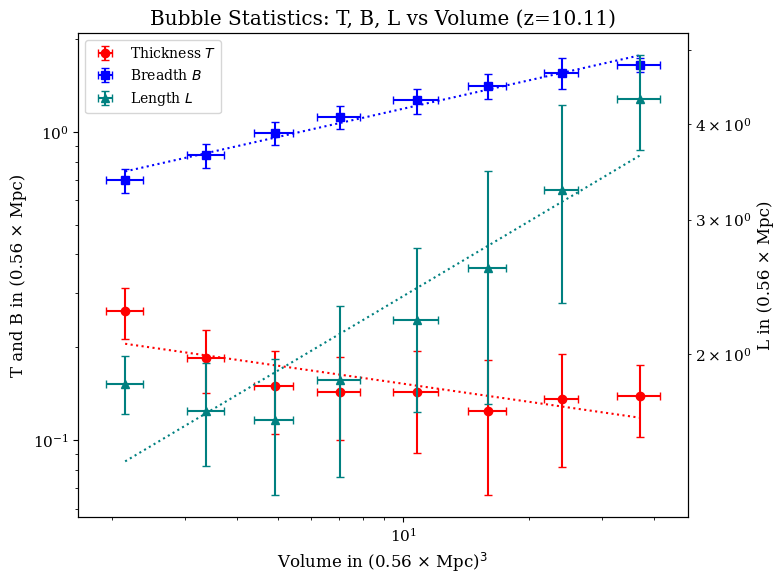

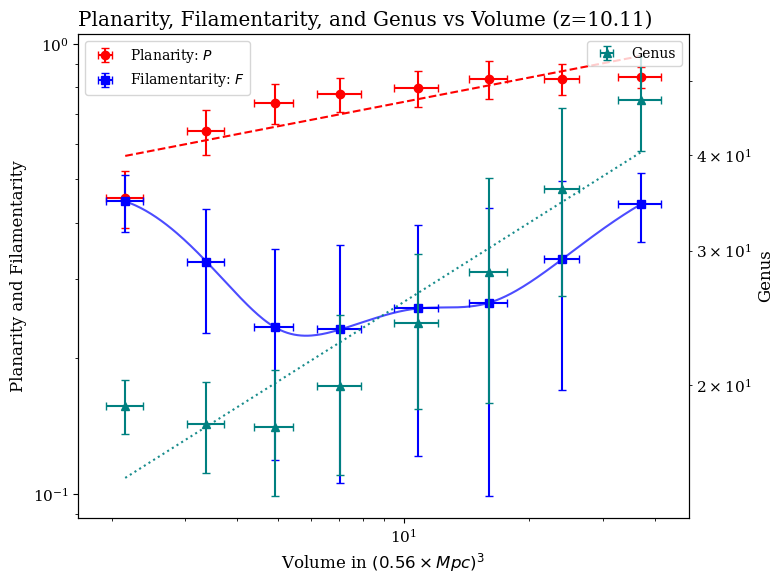

Slope for log T vs log V: -0.194
Slope for log B vs log V: 0.305
Slope for log L vs log V: 0.324
Slope for log P vs log V: 0.180
Slope for log G vs log V: 0.344


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Plot settings
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "axes.labelsize": 12,
    "font.size": 12,
    "legend.fontsize": 10,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
})

# Load and filter data
df = pd.read_csv("shapefinders_all_small_box.csv")
df_z = df[(df['z'] == 13.914) & (df['vol'] > 0)].copy()
vol = df_z['vol'].values

# Bin edges in log-space
edges = np.logspace(np.log10(vol.min()), np.log10(vol.max()), 9)

# Weighted statistics
def weighted_mean(values, weights):
    return np.sum(weights * values) / np.sum(weights)

def weighted_std(values, weights):
    mean = weighted_mean(values, weights)
    variance = np.sum(weights * (values - mean)**2) / np.sum(weights)
    return np.sqrt(variance)

# Initialize mean and std containers
vol_mean, vol_std = [], []
T_mean, T_std = [], []
B_mean, B_std = [], []
L_mean, L_std = [], []
P_mean, P_std = [], []
F_mean, F_std = [], []
G_mean, G_std = [], []

# Bin-wise computation
for i in range(len(edges) - 1):
    vmin, vmax = edges[i], edges[i + 1]
    mask = (vol >= vmin) & (vol < vmax)
    if not np.any(mask):
        continue

    bin_data = df_z[mask]
    vol_vals = bin_data['vol'].values
    weights = vol_vals

    vol_mean.append(weighted_mean(vol_vals, weights))
    vol_std.append(weighted_std(vol_vals, weights))

    for arr, name in zip(
        [(T_mean, T_std, 'T'), (B_mean, B_std, 'B'), (L_mean, L_std, 'L'),
         (P_mean, P_std, 'P'), (F_mean, F_std, 'F'), (G_mean, G_std, 'Genus')],
        ['T', 'B', 'L', 'P', 'F', 'Genus']
    ):
        values = bin_data[name].values
        arr[0].append(weighted_mean(values, weights))
        arr[1].append(weighted_std(values, weights))

# Convert to arrays
vol_mean = np.array(vol_mean)
vol_std = np.array(vol_std)
T_mean, T_std = np.array(T_mean), np.array(T_std)
B_mean, B_std = np.array(B_mean), np.array(B_std)
L_mean, L_std = np.array(L_mean), np.array(L_std)
P_mean, P_std = np.array(P_mean), np.array(P_std)
F_mean, F_std = np.array(F_mean), np.array(F_std)
G_mean, G_std = np.array(G_mean), np.array(G_std)

# Log-log fit function
def loglog_fit(x, y):
    mask = (x > 0) & (y > 0)
    logx = np.log10(x[mask])
    logy = np.log10(y[mask])
    slope, intercept = np.polyfit(logx, logy, 1)
    return slope, intercept, mask

# Fit T, B, L
mT, cT, _ = loglog_fit(vol_mean, T_mean)
mB, cB, _ = loglog_fit(vol_mean, B_mean)
mL, cL, _ = loglog_fit(vol_mean, L_mean)

# Fit P, G
mP, cP, maskP = loglog_fit(vol_mean, P_mean)
mG, cG, maskG = loglog_fit(vol_mean, G_mean)

# Interpolation volume
vol_fit = np.logspace(np.log10(vol_mean.min()), np.log10(vol_mean.max()), 300)

# Fit curves
T_fit_curve = 10**(mT * np.log10(vol_fit) + cT)
B_fit_curve = 10**(mB * np.log10(vol_fit) + cB)
L_fit_curve = 10**(mL * np.log10(vol_fit) + cL)
P_fit_curve = 10**(mP * np.log10(vol_fit) + cP)
G_fit_curve = 10**(mG * np.log10(vol_fit) + cG)

# F interpolation
sorted_idx = np.argsort(vol_mean)
vol_interp = np.logspace(np.log10(vol_mean.min()), np.log10(vol_mean.max()), 300)
F_spline = make_interp_spline(np.log10(vol_mean[sorted_idx]), F_mean[sorted_idx])
F_interp_curve = F_spline(np.log10(vol_interp))

# ----------------------------- Plot T, B, L ----------------------------- #
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.errorbar(vol_mean, T_mean, xerr=vol_std, yerr=T_std, fmt='o', color='red',
             capsize=3, label=r'Thickness $T$')
ax1.plot(vol_fit, T_fit_curve, linestyle=':', color='red')

ax1.errorbar(vol_mean, B_mean, xerr=vol_std, yerr=B_std, fmt='s', color='blue',
             capsize=3, label=r'Breadth $B$')
ax1.plot(vol_fit, B_fit_curve, linestyle=':', color='blue')

ax2.errorbar(vol_mean, L_mean, xerr=vol_std, yerr=L_std, fmt='^', color='teal',
             capsize=3, label=r'Length $L$')
ax2.plot(vol_fit, L_fit_curve, linestyle=':', color='teal')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('Volume in (0.56 × Mpc)$^3$')
ax1.set_ylabel('T and B in (0.56 × Mpc)')
ax2.set_ylabel('L in (0.56 × Mpc)')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Bubble Statistics: T, B, L vs Volume (z=10.11)')
plt.tight_layout()
plt.show()

# ----------------------------- Plot P, F, Genus ----------------------------- #
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

ax1.errorbar(vol_mean[maskP], P_mean[maskP], xerr=vol_std[maskP], yerr=P_std[maskP],
             fmt='o', color='red', capsize=3, label='Planarity: $P$')
ax1.plot(vol_fit, P_fit_curve, linestyle='--', color='red')

ax1.errorbar(vol_mean, F_mean, xerr=vol_std, yerr=F_std,
             fmt='s', color='blue', capsize=3, label='Filamentarity: $F$')
ax1.plot(vol_interp, F_interp_curve, linestyle='-', color='blue', alpha=0.7)

ax2.errorbar(vol_mean[maskG], G_mean[maskG], xerr=vol_std[maskG], yerr=G_std[maskG],
             fmt='^', color='teal', capsize=3, label='Genus')
ax2.plot(vol_fit, G_fit_curve, linestyle=':', color='teal', alpha=0.9)

ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')

ax1.set_xlabel('Volume in $(0.56 \\times Mpc)^3$')
ax1.set_ylabel('Planarity and Filamentarity')
ax2.set_ylabel('Genus')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Planarity, Filamentarity, and Genus vs Volume (z=10.11)', loc='left')
plt.tight_layout()
plt.savefig('./Genus.png')
plt.show()

# ----------------------------- Print Slopes ----------------------------- #
print(f"Slope for log T vs log V: {mT:.3f}")
print(f"Slope for log B vs log V: {mB:.3f}")
print(f"Slope for log L vs log V: {mL:.3f}")
print(f"Slope for log P vs log V: {mP:.3f}")
print(f"Slope for log G vs log V: {mG:.3f}")
